# PROJET DE CLASSIFICATION D'IMAGES CIFAR

Dans le projet les images sont divisées en 10 classes suivantes :
0 Avions
1 Voitures
2 Oiseaux
3 Chats
4 Cerfs
5 Chiens
6 Grenouilles
7 Chevaux
8 Bateaux
9 Camions


### Import des librairies et du jeu de données

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical 
import random

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks = True, grid = False)




In [40]:
(X_train, y_train) , (X_test,y_test) = cifar10.load_data()

In [41]:
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf", "Chien", "Grenouille", "Chaval", "Bateau", "Camion"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Visualisation des données

label = [0]


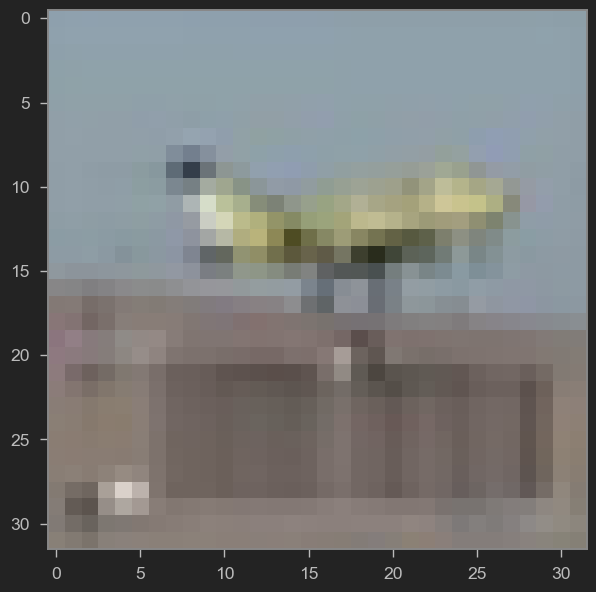

In [42]:
i = random.randint(1, len(X_train)) 
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))


label = [4]


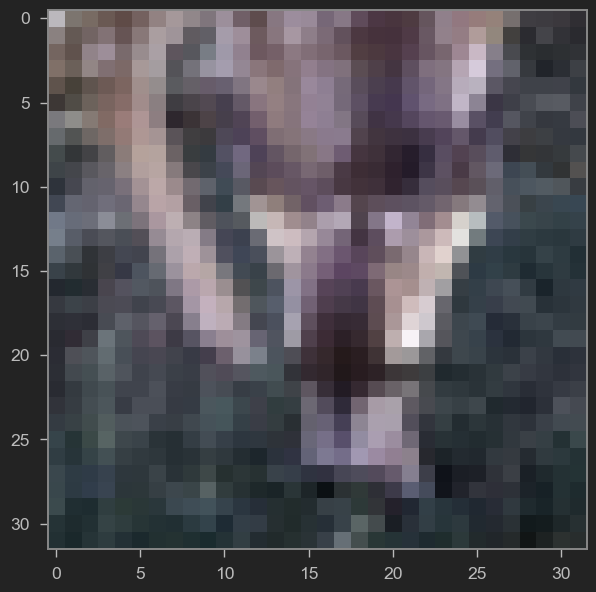

In [43]:
i = random.randint(1, len(X_test)) 
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

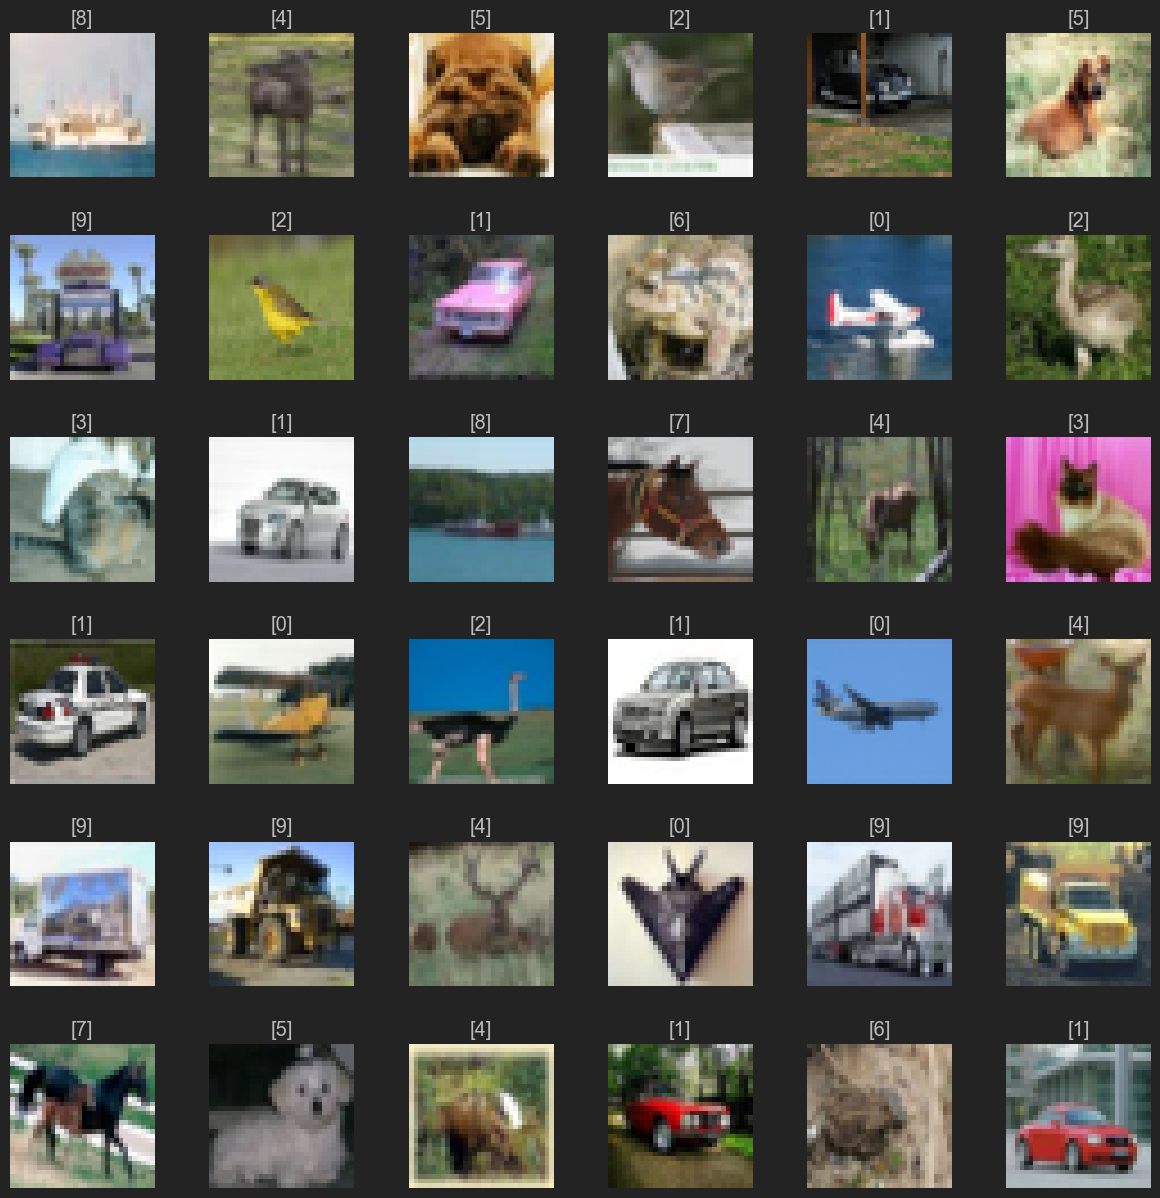

In [44]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

<function matplotlib.pyplot.show(close=None, block=None)>

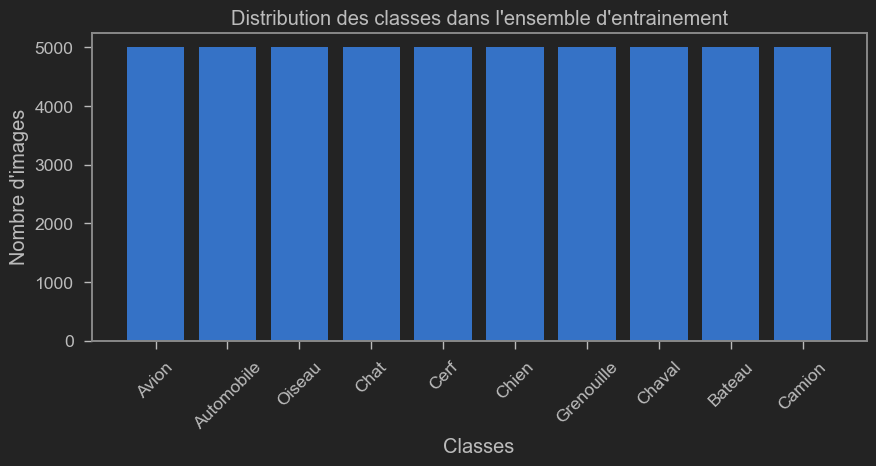

In [45]:
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1

plt.figure(figsize=(10,4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entrainement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show


### preparation des données

In [46]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [47]:
# Normalisation des pixels
X_train =   X_train/255
X_test = X_test/255

In [48]:
number_cat = 10

In [49]:
# Transformation des etiquettes en vecteurs one-hot (encodage catégoriel)
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [50]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [52]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [53]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

### Construction de notre modèle de deep learning en utilisant Keras

In [58]:
#création de l'instance 
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

### Entrainement du modèle d'apprentissage profond

In [63]:
cnn.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [64]:
epochs = 10
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = epochs)

Epoch 1/10
782/782 [==============================] - 62s 76ms/step - loss: 1.6197 - accuracy: 0.3938
Epoch 2/10
782/782 [==============================] - 58s 74ms/step - loss: 1.2572 - accuracy: 0.5485
Epoch 3/10
782/782 [==============================] - 57s 72ms/step - loss: 1.0847 - accuracy: 0.6140
Epoch 4/10
782/782 [==============================] - 55s 71ms/step - loss: 0.9639 - accuracy: 0.6596
Epoch 5/10
782/782 [==============================] - 55s 70ms/step - loss: 0.8784 - accuracy: 0.6905
Epoch 6/10
782/782 [==============================] - 57s 72ms/step - loss: 0.8195 - accuracy: 0.7122
Epoch 7/10
782/782 [==============================] - 57s 73ms/step - loss: 0.7603 - accuracy: 0.7353
Epoch 8/10
782/782 [==============================] - 56s 71ms/step - loss: 0.7204 - accuracy: 0.7472
Epoch 9/10
782/782 [==============================] - 59s 75ms/step - loss: 0.6794 - accuracy: 0.7614
Epoch 10/10
782/782 [==============================] - 57s 73ms/step - loss: 0.643

### Evaluation du modele entrainé

In [65]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 10ms/step - loss: 0.7356 - accuracy: 0.7529
Test Accuracy: 0.7529000043869019


In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_classes = cnn.predict(X_test)
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

313/313 [==============================] - 4s 9ms/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets